<a href="https://colab.research.google.com/github/aherre52/MAT422/blob/main/HW_1_2_MAT_422.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **HW 1.2**
# **Elements of Linear Algebra**

Concepts covered:


*   1.2.1. Linear spaces
*   1.2.2. Orthogonality
*   1.2.3. Gram–Schmidt process
*   1.2.4. Eigenvalues and eigenvectors





# 1.2.1: Linear Spaces
To demonstrate concept of linear spaces, will present an example that shows linear independence and how linear independence is needed to span a subspace. The first code block randomly generates a vector in R2 and the linearly independent vectors v1 and v2 can be linearly combined to get the desired vector.

#Linear Subspaces and Span

Given two linearly independent vectors $\mathbf{v}_1$ and $\mathbf{v}_2$ in $\mathbb{R}^2$, the span of these vectors, denoted as $\text{span}\{\mathbf{v}_1, \mathbf{v}_2\}$, is the set of all possible linear combinations of $\mathbf{v}_1$ and $\mathbf{v}_2$. This span forms a linear subspace of $\mathbb{R}^2$, meaning it is closed under both scalar multiplication and vector addition.

Mathematically, for any scalars $x$ and $y$, a vector $\mathbf{v}_3$ in the span can be written as:

\$
\mathbf{v}_3 = x\mathbf{v}_1 + y\mathbf{v}_2
\$

By solving the equation $A\mathbf{c} = \mathbf{v}_3$, where $A$ is the matrix with $\mathbf{v}_1$ and $\mathbf{v}_2$ as columns, we can determine the coefficients $x$ and $y$ that can be used to create a linear combination that equals the randomly generated $\mathbf{v}_3$. This demonstrates that $\mathbf{v}_1$ and $\mathbf{v}_2$ span $\mathbb{R}^2$.


In [3]:
#need these libraries to work with matrices and create figures
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#provide two vectors that are not scalar multiples of each other, otherwise known as linearly independent
v1 = np.array([1,2])
v2 = np.array([3,5])

#now generate a random vector and use linear combinations of v1 and v2 to find it
v3 = np.random.randint(-20, 21, size = 2)

# In order to solve for the appropriate coefficients of v1 and v2, need to
# stack v1 and v2 as columns to form the matrix A
A = np.column_stack((v1, v2))

# Solve the equation Ax = v3 using linalg
# can also think of this as xv1 + yv2 = v3
# this shows that the two vectors v1 and v2 span R2
x, y = np.linalg.solve(A, v3)

print(f"v1: {v1}")
print(f"v2: {v2}")
print("Matrix A:")
print(A)
print(f"v3: {v3}")
print(f"Solution: x = {x}, y = {y}")

v1: [1 2]
v2: [3 5]
Matrix A:
[[1 3]
 [2 5]]
v3: [ -3 -19]
Solution: x = -42.0, y = 13.0


#Linear Dependence
Linear dependence occurs when a vector in a set can be expressed as a linear combination of the other vectors in that set. In this code block, we have two vectors $\mathbf{v}_1 = \begin{bmatrix} 1 \\ 3 \end{bmatrix}$ and $\mathbf{v}_2 = 2 \mathbf{v}_1 = \begin{bmatrix} 2 \\ 6 \end{bmatrix}$. Simply put, $\mathbf{v}_2$ is double what $\mathbf{v}_1$ is.

Because $\mathbf{v}_2$ is a scalar multiple of $\mathbf{v}_1$, any linear combination of $\mathbf{v}_1$ and $\mathbf{v}_2$ will lie on the same line. Subsequently, this implies that $\mathbf{v}_1$ and $\mathbf{v}_2$ are linearly dependent, meaning they do not span $\mathbb{R}^2$, but instead, only span a one-dimensional subspace (a line).

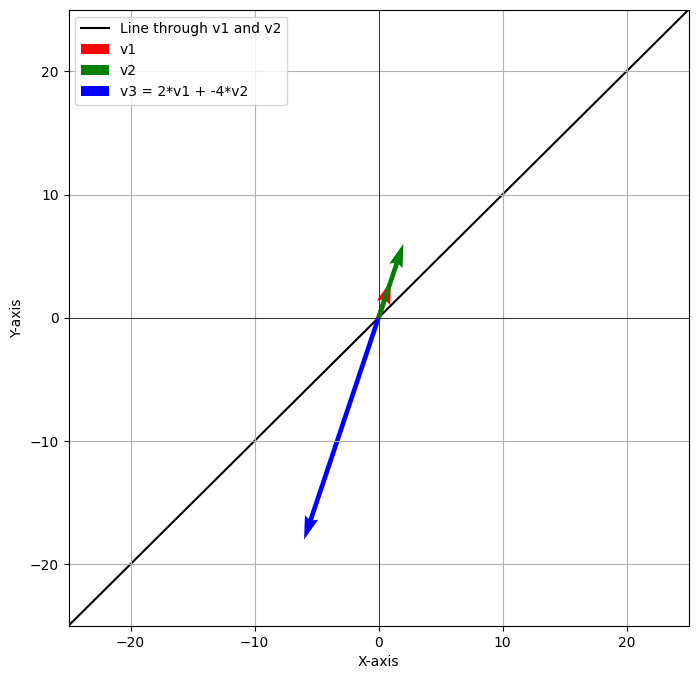

[ -6 -18]


In [6]:
#now to show linear dependence, pick two linearly dependent vectors. v2 = 2* v1
v1 = np.array([1,3])
v2 = np.array([2,6])

#will pick two random coefficients
x = np.random.randint(-5, 6, size = 1)
y = np.random.randint(-5, 6, size = 1)

# Compute the linear combination x*v1 + y*v2
v3 = x * v1 + y * v2

# Create a 25x25 plot
plt.figure(figsize=(8, 8))
plt.xlim(-25, 25)
plt.ylim(-25, 25)

# Plot the line defined by v1 and v2
line_x = np.linspace(-25, 25, 100)
line_y = 3 * line_x  # Since v2 = 2*v1, the slope is the same as v1

plt.plot(line_x, line_y, 'k-', label='Line through v1 and v2', zorder=1)

# Plot the vectors v1, v2, and v3
plt.quiver(0, 0, v1[0], v1[1], angles='xy', scale_units='xy', scale=1, color='r', label='v1')
plt.quiver(0, 0, v2[0], v2[1], angles='xy', scale_units='xy', scale=1, color='g', label='v2')
plt.quiver(0, 0, v3[0], v3[1], angles='xy', scale_units='xy', scale=1, color='b', label=f'v3 = {x[0]}*v1 + {y[0]}*v2')

# Add grid, labels, legend, etc
plt.grid(True)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()

# Finally, now show the plot
plt.show()
print(v3)

# 1.2.2: Orthogonality
To demonstrate the concept of orthogonality, will present an example that shows dot product of orthogonal vectors is 0, Lemma 1.2.12 (Pythagorean theorem), and the angle between two vectors is 90 degrees.

In this demonstration, I chose to work with the standard basis vectors $\mathbf{u} = \begin{bmatrix} 1 \\ 0 \end{bmatrix}$ and $\mathbf{v} = \begin{bmatrix} 0 \\ 1 \end{bmatrix}$, which are orthogonal and span the entire two-dimensional space, $\mathbb{R}^2$.

To verify that $\mathbf{u}$ and $\mathbf{v}$ are orthogonal, we calculate their dot product and should expect a value of 0:

$\
\mathbf{u} \cdot \mathbf{v} = 1 \times 0 + 0 \times 1 = 0
\$

Can additionally explore the properties of these orthogonal vectors by demonstrating the Pythogorean Theoroem, mentioned in the textbook.

$\
\|\mathbf{u} + \mathbf{v}\|^2 = \|\mathbf{u}\|^2 + \|\mathbf{v}\|^2
\$

Since $\mathbf{u}$ and $\mathbf{v}$ are unit vectors, their norms $\|\mathbf{u}\|$ and $\|\mathbf{v}\|$ both equal 1(by definition). The norm of their sum, $\mathbf{u} + \mathbf{v} = \begin{bmatrix} 1 \\ 1 \end{bmatrix}$, is calculated as:

$\
\|\mathbf{u} + \mathbf{v}\| = \sqrt{1^2 + 1^2} = \sqrt{2}
\$

Squaring both sides:

$\
\|\mathbf{u} + \mathbf{v}\|^2 = 2
\$

$\
\|\mathbf{u}\|^2 + \|\mathbf{v}\|^2 = 1^2 + 1^2 = 2
\$

As expected, $\|\mathbf{u} + \mathbf{v}\|^2 = \|\mathbf{u}\|^2 + \|\mathbf{v}\|^2$, which is consistent with the Pythagorean theorem.

A final way is to calculate the angle between $\mathbf{u}$ and $\mathbf{v}$, which should be $90^\circ$ for orthogonal vectors. The cosine of the angle $\theta$ between two vectors is given by:

$\
\cos \theta = \frac{\mathbf{u} \cdot \mathbf{v}}{\|\mathbf{u}\| \|\mathbf{v}\|}
\$

Since $\mathbf{u} \cdot \mathbf{v} = 0$, it follows that $\cos \theta = 0$, and therefore $\theta = 90^\circ$.

Lastly, the plot generated by the code illustrates the orthogonal vectors $\mathbf{u}$ and $\mathbf{v}$ in $\mathbb{R}^2$, and the $90^\circ$ angle they make.


Vector u: [1 0]
Vector v: [0 1]
Dot product u·v: 0
LHS - Sum vector ||u+v||^2: 2.0
RHS - ||u||^2 + ||v||^2: 2.0
Angle between u and v: 90.0 degrees


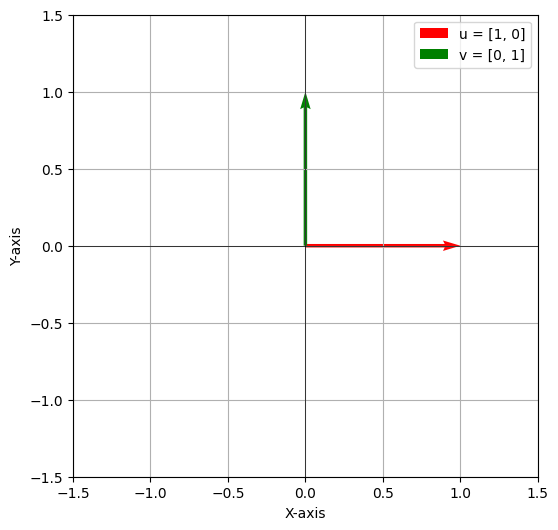

In [ ]:
# simply use standard basis vectors as they are orthogonal and span R2
u = np.array([1, 0])  # Along the x-axis
v = np.array([0, 1])  # Along the y-axis

# to demonstrate they are orthogonal, will calculate
# their dot product-which should be 0 for orthogonal vectors
dot_product = np.dot(u, v)

print(f"Vector u: {u}")
print(f"Vector v: {v}")
print(f"Dot product u·v: {dot_product}")  # Should print 0

#will now demonstrate that given orthogonal vectors u,v , follow pythagoream thm:
# ||u + v||^2 = ||u||^2 + ||v||^2.

sum_vector = u+v


#calculate the norms of the vectors

norm_sum = np.linalg.norm(sum_vector)

sum_squared = norm_sum**2

# for u and v, this value will just be 1 since they are standard basis and have length 1
norm_u = np.linalg.norm(u)
norm_v = np.linalg.norm(v)

uNorm_squared = norm_u**2
vNorm_squared = norm_v**2

RHS_sum = uNorm_squared+vNorm_squared

print(f"LHS - Sum vector ||u+v||^2: {sum_squared:.1f}")
print(f"RHS - ||u||^2 + ||v||^2: {RHS_sum:.1f}")


# Calculate the angle between u and v (should be 90 degrees for orthogonal vectors)
cos_theta = dot_product / (norm_u * norm_v)
theta = np.arccos(cos_theta)  # in radians
theta_degrees = np.degrees(theta)  # convert to degrees

print(f"Angle between u and v: {theta_degrees} degrees")

# will now plot the vectors in R^2
plt.figure(figsize=(6, 6))
plt.quiver(0, 0, u[0], u[1], angles='xy', scale_units='xy', scale=1, color='r', label='u = [1, 0]')
plt.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1, color='g', label='v = [0, 1]')

# Add final touches (grid, axis, legend, etc)
plt.grid(True)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()

# Show the plot
plt.show()


Given a vector $\mathbf{u}_1 = \begin{bmatrix} 1 \\ 1 \end{bmatrix}$, we can project a vector $\mathbf{v} = \begin{bmatrix} 3 \\ 2 \end{bmatrix}$, which is not in the subspace spanned by $\mathbf{u}_1$, onto this subspace using the Best Approximation Theorem. The orthogonal projection of $\mathbf{v}$ onto $\mathbf{u}_1$ minimizes the distance between $\mathbf{v}$ and the subspace. The difference $\mathbf{v} - \text{proj}_{\mathbf{u}_1} \mathbf{v}$ represents the component of $\mathbf{v}$ orthogonal to the subspace.


Intuitively, an angle of $90^\circ$ is optimal for orthogonality because the dot product $\mathbf{u} \cdot \mathbf{v}$ equals zero, minimizing the projection of one vector onto the other. While an obtuse angle (greater than  $90^\circ$) would result in a negative dot product, indicating a non-minimal projection.


Original vector v: [3 2]
Subspace vector u1: [1 1]
Normalized u1: [0.70710678 0.70710678]
Orthogonal projection of v onto u1: [2.5 2.5]
Vector component orthogonal to u1: [ 0.5 -0.5]


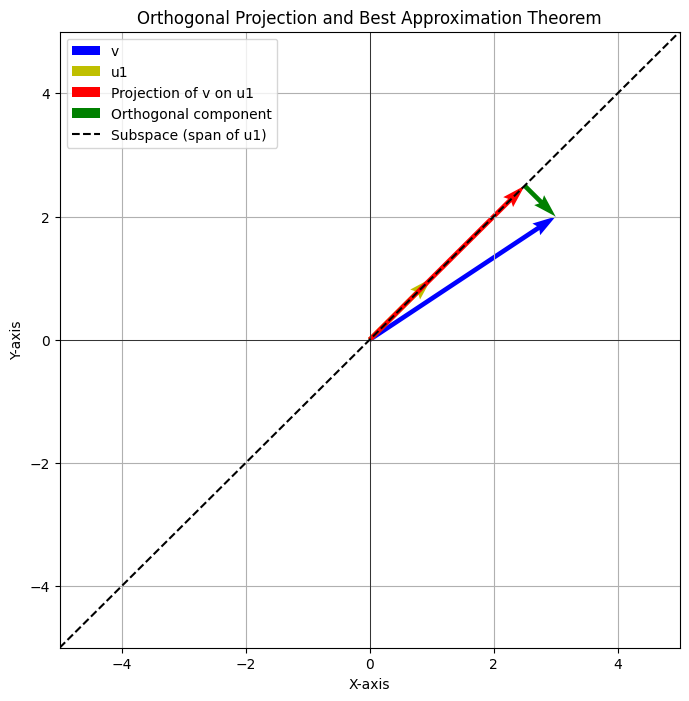

In [ ]:
# u1 will be the the subspace vector. pick a vector, v, not in its subspace.
# will use best approx thm to project v onto u and minimize distance
u1 = np.array([1, 1])  # Basis vector for the subspace
v = np.array([3, 2])   # Vector not in the subspace

# Normalize u1 to use it in the projection calculation
u1_normalized = u1 / np.linalg.norm(u1)

# Compute the orthogonal projection of v onto u1
# sinc u1 is normalized, will divide by 1, so omitted it in the code
projection_v_on_u1 = np.dot(v, u1_normalized) * u1_normalized

# Compute the vector component orthogonal to u1
v_minus_projection = v - projection_v_on_u1

# Print results
print(f"Original vector v: {v}")
print(f"Subspace vector u1: {u1}")
print(f"Normalized u1: {u1_normalized}")
print(f"Orthogonal projection of v onto u1: {projection_v_on_u1}")
print(f"Vector component orthogonal to u1: {v_minus_projection}")

# will now create figure/plot for visualization
plt.figure(figsize=(8, 8))
plt.xlim(-5, 5)
plt.ylim(-5, 5)

# Plot the vectors
plt.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1, color='b', label='v')
plt.quiver(0, 0, u1[0], u1[1], angles='xy', scale_units='xy', scale=1, color='y', label='u1')
plt.quiver(0, 0, projection_v_on_u1[0], projection_v_on_u1[1], angles='xy', scale_units='xy', scale=1, color='r', label='Projection of v on u1')
plt.quiver(projection_v_on_u1[0], projection_v_on_u1[1], v_minus_projection[0], v_minus_projection[1], angles='xy', scale_units='xy', scale=1, color='g', label='Orthogonal component')

# Draw the subspace line
line_x = np.linspace(-5, 5, 100)
line_y = line_x  # Since u1 = [1,1], the line y = x represents the subspace
plt.plot(line_x, line_y, 'k--', label='Subspace (span of u1)')

# Adding labels and legend
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(True)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.title('Orthogonal Projection and Best Approximation Theorem')
plt.show()


# 1.2.3: Gram–Schmidt process

To demonstrate concept of Gram–Schmidt process, will write code that implements the Gram–Schmidt algorithm to obtain an orthonormal basis.


To find the orthonormal basis using the Gram-Schmidt process, we iteratively go through the original vectors $\mathbf{v}_1$, $\mathbf{v}_2$, and $\mathbf{v}_3$ from the matrix $A$. The first orthonormal vector is simply the normalization of $\mathbf{v}_1$: $\mathbf{u}_1 = \frac{\mathbf{v}_1}{\|\mathbf{v}_1\|}$. The next step involves subtracting the projection of $\mathbf{v}_2$ onto $\mathbf{u}_1$ from $\mathbf{v}_2$ and then normalizing to obtain $\mathbf{u}_2$: $\mathbf{u}_2 = \frac{\mathbf{v}_2 - \text{proj}_{\mathbf{u}_1}(\mathbf{v}_2)}{\|\mathbf{v}_2 - \text{proj}_{\mathbf{u}_1}(\mathbf{v}_2)\|}$. Finally, $\mathbf{u}_3$ is computed by removing the components of $\mathbf{v}_3$ along both $\mathbf{u}_1$ and $\mathbf{u}_2$ and then normalizing: $\mathbf{u}_3 = \frac{\mathbf{v}_3 - \text{proj}_{\mathbf{u}_1}(\mathbf{v}_3) - \text{proj}_{\mathbf{u}_2}(\mathbf{v}_3)}{\|\mathbf{v}_3 - \text{proj}_{\mathbf{u}_1}(\mathbf{v}_3) - \text{proj}_{\mathbf{u}_2}(\mathbf{v}_3)\|}$. This process ensures that the vectors are both orthogonal and normalized. If the matrix $A$ was bigger, this process would continue iteratively as many times as there are rows/columns.

Finally, using the concepts from orthonormality covered in this chapter, I check and confirm the produced matrix contains orthogonal AND normalized vectors, using techniques we have already demonstrated/seen before.


In [ ]:
#will first define two functions that will be used to get the orthonormal basis

#first is the projection helper function
#computes the projection of vector u onto vector v.

def projection(u, v):
    return (np.dot(u, v) / np.dot(v, v)) * v


#next is gram-schmidt function, which applies the GS process to a matrix
#to get the orthonormal basis

def gram_schmidt(A):

    #get the dimension of A. Since its a square, number of columns and rows is same
    n = A.shape[1]
    #now initialize an empty matrix of same shape as A
    Q = np.zeros_like(A)

    #use for loop, which will iterate as many times as number of columns/rows
    for i in range(n):
        #will get first vector from matrix
        v = A[:, i]

        #use a nested for loop to subtract projections of v onto the previously computed basis vectors
        for j in range(i):
            v -= projection(v, Q[:, j])

        # last step is to normalize the vector
        Q[:, i] = v / np.linalg.norm(v)

    return Q

#will now define a 3x3 matrix with linearly independent vectors
#To avoid issues, declared each value as a float. had encountered issues using int values
A = np.array([[4.0, 1.0, 5.0],
              [1.0,3.0, 8.0],
              [2.0, 5.0,9.0]])

# Compute the orthonormal basis using Gram-Schmidt process
orthonormal_basis = gram_schmidt(A)
print("Orthonormal Basis:\n", orthonormal_basis)

#to verify our work and that the basis produced is both orthogonal AND normalized
#first will check that dot product is 0

n = orthonormal_basis.shape[1]

print("\nChecking orthogonality:")
for i in range(n):
  #need to use nested loop to do all three combos of vectors
    for j in range(i+1, n):
        dot_product = np.dot(orthonormal_basis[:, i], orthonormal_basis[:, j])
        print(f"Dot product of vector {i+1} and vector {j+1}: {dot_product:.2f}")

# Check normalization
print("\nChecking normalization:")
for i in range(n):
    norm = np.linalg.norm(orthonormal_basis[:, i])
    print(f"Norm of vector {i+1}: {norm:.2f}")


Orthonormal Basis:
 [[ 0.87287156 -0.48564708  0.04735137]
 [ 0.21821789  0.47531416  0.8523247 ]
 [ 0.43643578  0.73363708 -0.5208651 ]]

Checking orthogonality:
Dot product of vector 1 and vector 2: 0.00
Dot product of vector 1 and vector 3: 0.00
Dot product of vector 2 and vector 3: -0.00

Checking normalization:
Norm of vector 1: 1.00
Norm of vector 2: 1.00
Norm of vector 3: 1.00


# 1.2.4: Eigenvalues and Eigenvectors

To demonstrate concept of Eigenvalues and eigenvectors, will present an example that shows a sqaure matrix A multiplied by an eigenvectors has the same effect as scaling the eigenvector by a non-zero value (the eigenvalue).



For a symmetric matrix $A$, its eigenvalues are real, and its eigenvectors are orthogonal. In the code below, we compute the eigenvalues and eigenvectors of $A = \begin{bmatrix} 4 & 1 \\ 1 & 3 \end{bmatrix}$ using $\texttt{numpy}$'s $\texttt{eig}$ function. The eigenvector $\mathbf{x}_1$ corresponding to eigenvalue $\lambda_1$ satisfies the equation $A \mathbf{x}_1 = \lambda_1 \mathbf{x}_1$, which is demonstrated by calculating both sides, $A \mathbf{x}_1$ and $\lambda_1 \mathbf{x}_1$, and seeing they are equal. The figure generated by the code helps visually see that the vectors generated by the LHS and RHS calculations are the same, which illustrates the effect of the eigenvalue as a scaling factor.


Eigenvalues:  [4.61803399 2.38196601]
Eigenvectors: 
 [[ 0.85065081 -0.52573111]
 [ 0.52573111  0.85065081]]
LHS - A*x1 : [3.92833435 2.42784414]
RHS - lambda1*x1 : [3.92833435 2.42784414]


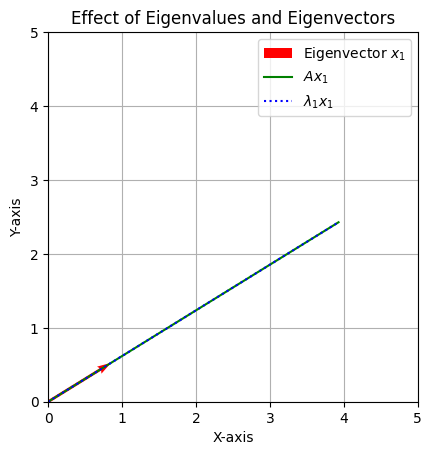

In [ ]:
#begin demonstration with a symmetric matrix, since they are easier to work with
# and eigenvalues of a symmetric matrix are all real numbers
A = np.array([[4, 1],
             [1,3]])

#will use linalg from np to compute eigenvalues and eigenvectors

eigvals, eigvecs = np.linalg.eig(A)
print("Eigenvalues: ", eigvals)
print("Eigenvectors: \n", eigvecs)

#now want to show that A*x = lambda*x. will use first eigenvector and eigenvalue

x1 = eigvecs[:,0]
lambda1 = eigvals[0]

LHS = A @ x1
RHS =  lambda1 * x1

print(f"LHS - A*x1 : {LHS}")
print(f"RHS - lambda1*x1 : {RHS}")

# Create a figure and axis for plotting
fig, ax = plt.subplots()

# Plot the original eigenvector
ax.quiver(0, 0, x1[0], x1[1], angles='xy', scale_units='xy', scale=1, color='r', label='Eigenvector $x_1$')

# *****opting to not use quivers for the following two vectors as I couldn't adjust their linestyle***
# Plot the LHS resulting vector from A*x1
ax.plot([0, LHS[0]], [0, LHS[1]], color='g', label='$A x_1$')

# Plot the RHS resulting vector from lambda1*x1
ax.plot([0, RHS[0]], [0, RHS[1]], color='b', linestyle=':', label='$\lambda_1 x_1$')

# Set plot limits
ax.set_xlim(0, 5)
ax.set_ylim(0, 5)

# Add the grid, legend, and labels
ax.grid()
ax.set_aspect('equal')
ax.legend()
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Effect of Eigenvalues and Eigenvectors')

# Show the plot
plt.show()
